In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("Election_Data.xlsx",'Election_Dataset_Two Classes')

In [ ]:
print(df.shape)


(1525, 10)


In [ ]:
print(df.dtypes)


Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,NaN,NaN,NaN,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,NaN,NaN,NaN,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,NaN,NaN,NaN,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,NaN,NaN,NaN,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,NaN,NaN,NaN,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,NaN,NaN,NaN,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


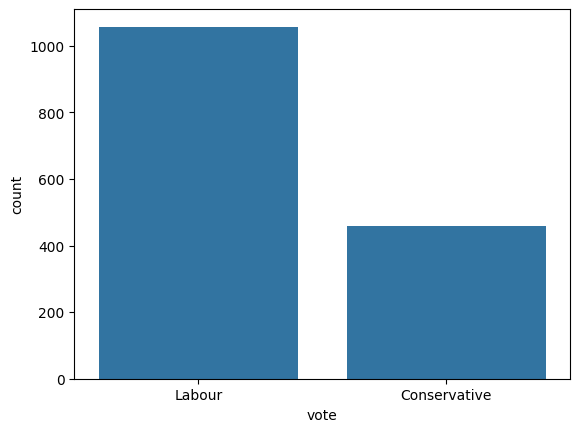

In [ ]:
sns.countplot(x='vote', data=df)  # Vote distribution
plt.show()

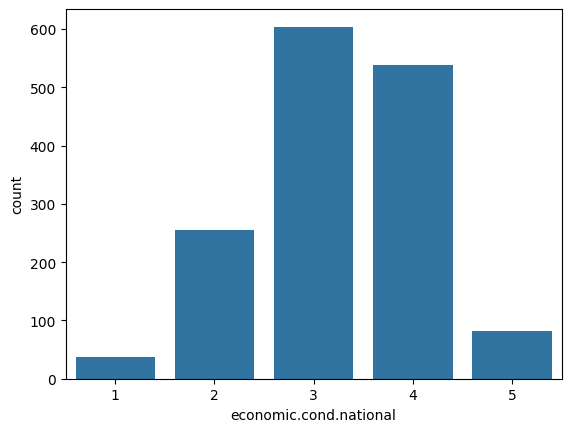

In [ ]:
sns.countplot(x='economic.cond.national', data=df)
plt.show()

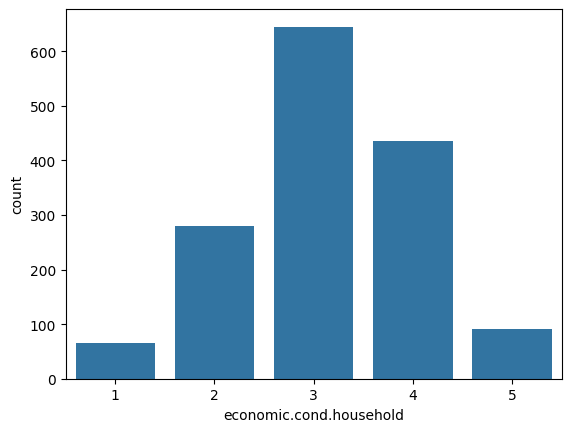

In [ ]:

sns.countplot(x='economic.cond.household', data=df)
plt.show()

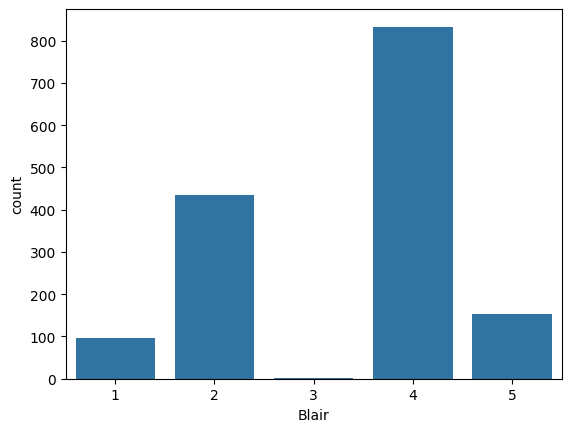

In [ ]:
sns.countplot(x='Blair', data=df)
plt.show()

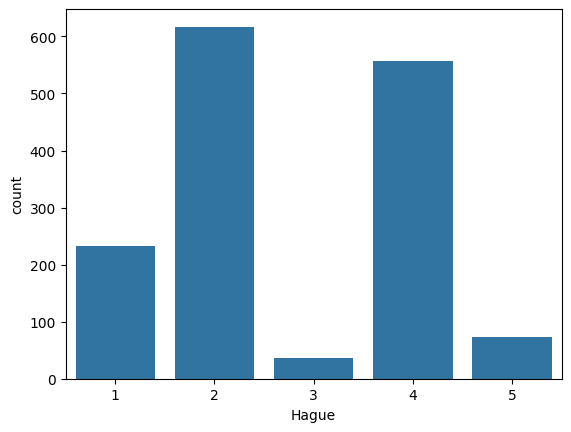

In [ ]:
sns.countplot(x='Hague', data=df)
plt.show()

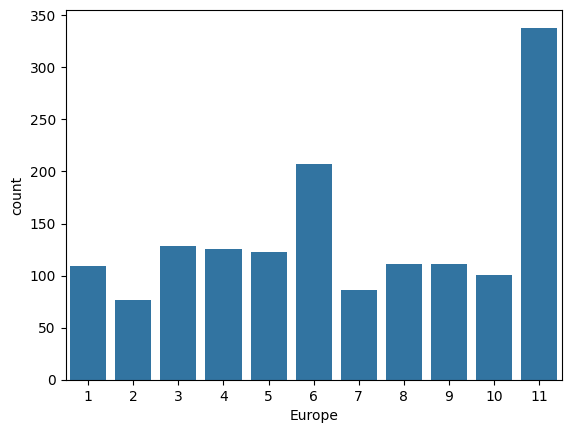

In [ ]:
sns.countplot(x='Europe', data=df)
plt.show()

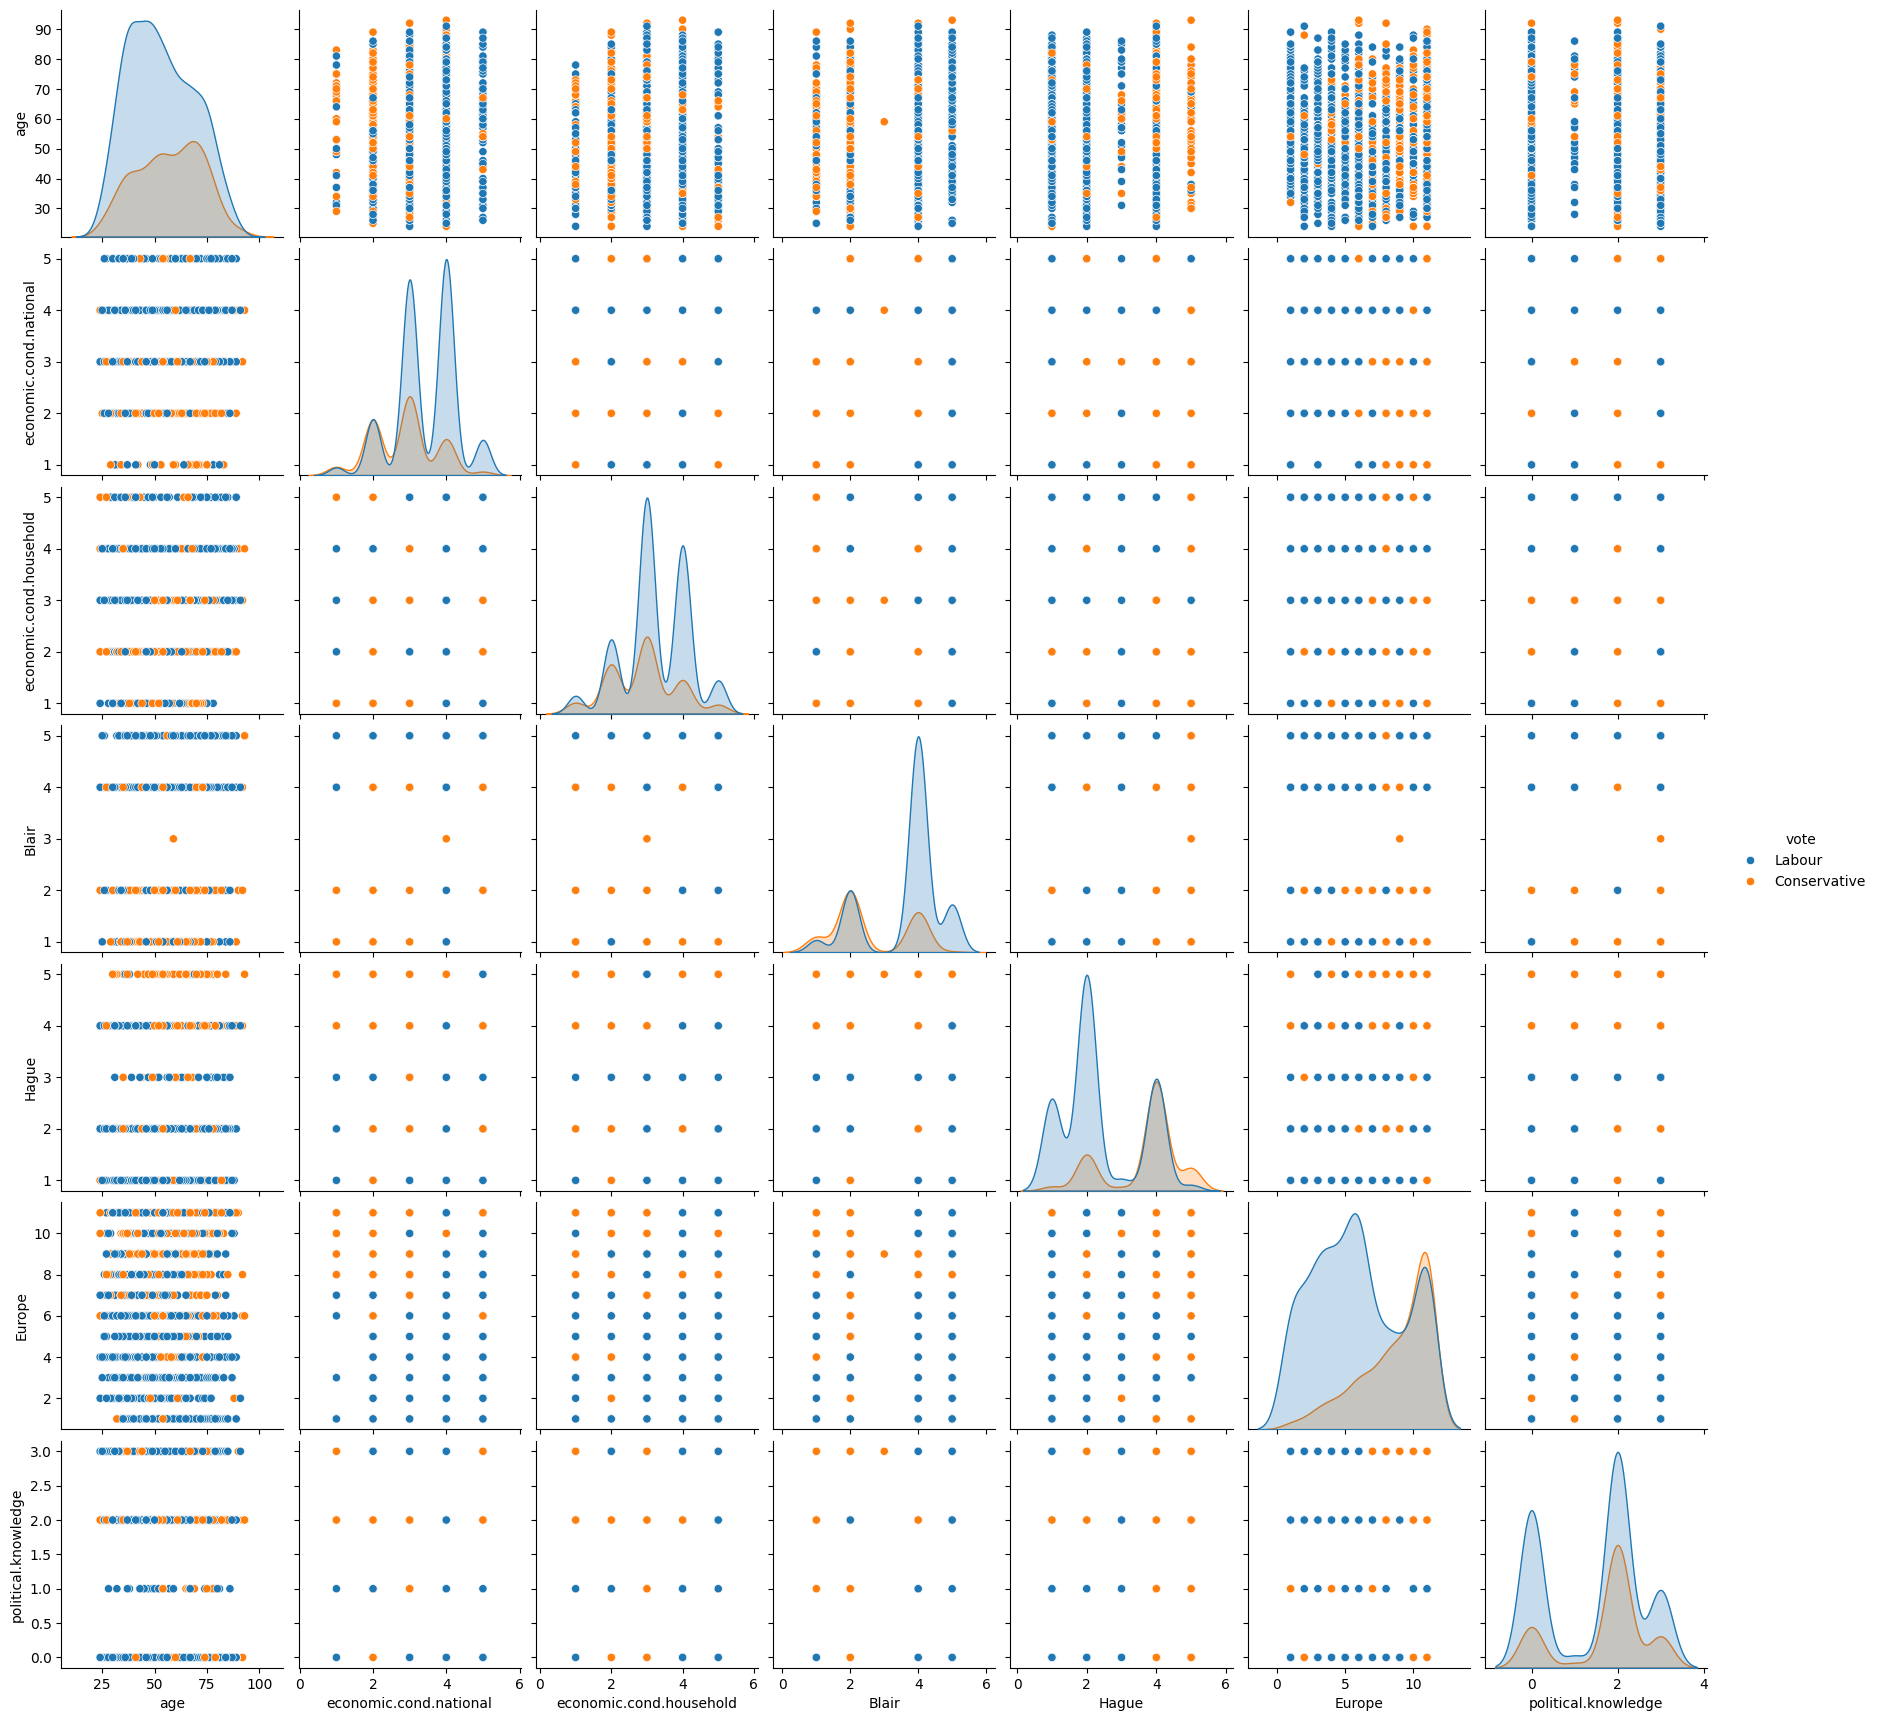

<ipython-input-16-26383f49ae1f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


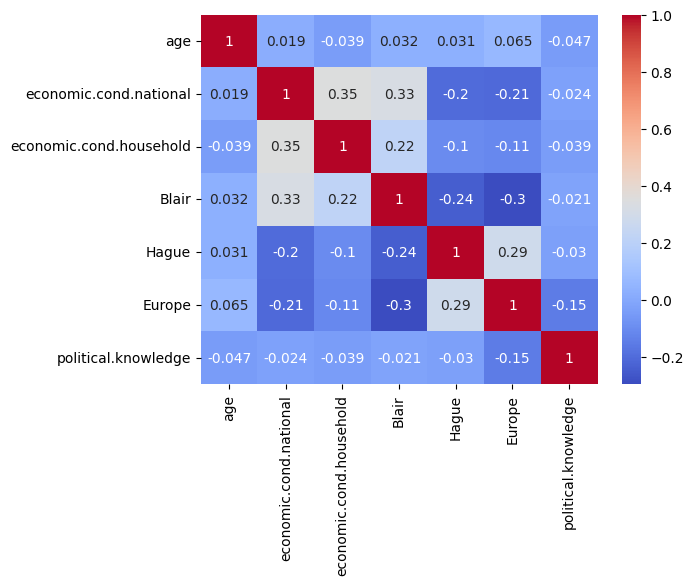

In [ ]:
sns.pairplot(df, hue='vote')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
type(numerical_columns)

pandas.core.indexes.base.Index

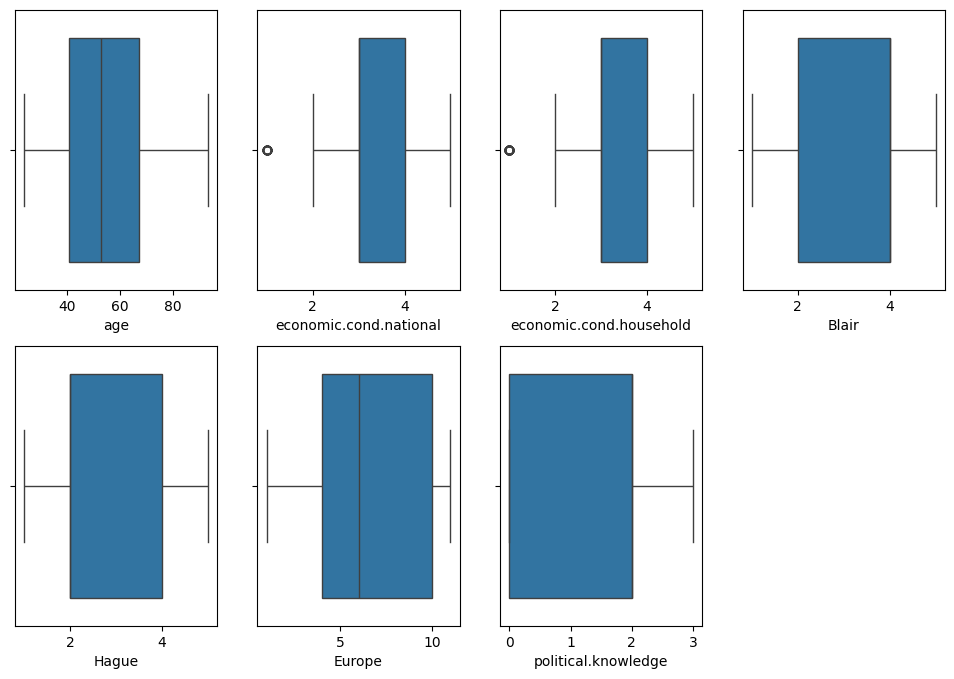

In [ ]:

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[column])

plt.show()

In [ ]:
# Assuming 'df' has categorical columns like 'gender'
df_encoded = pd.get_dummies(df, columns=['gender','vote'], drop_first=True)


In [ ]:
df_encoded.tail(20)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
1505,75,3,2,4,4,6,2,1,1
1506,62,3,3,4,1,6,2,1,1
1507,52,2,1,1,4,8,2,0,0
1508,70,2,2,4,2,11,2,1,0
1509,67,3,3,5,2,4,2,0,1
1510,73,4,3,4,2,11,0,1,1
1511,63,3,3,4,2,8,2,0,1
1512,75,3,3,2,4,7,1,1,0
1513,46,3,3,4,2,4,2,1,1
1514,74,3,3,5,2,11,0,0,1


In [ ]:
df_encoded.rename(columns={'gender_male': 'gender'}, inplace=True)

In [ ]:
df_encoded.rename(columns={'vote_Labour': 'vote'}, inplace=True)

In [ ]:
df_encoded.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote
0,43,3,3,4,1,2,2,0,1
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,0,1
4,41,2,2,1,1,6,2,1,1


**DATA SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('vote', axis=1)
y = df_encoded['vote']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Assuming you've imported the necessary libraries

# Model Initialization
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
bagging_model = BaggingClassifier()
boosting_model = AdaBoostClassifier()


Model: KNeighborsClassifier
Train Data Confusion Matrix:
[[287  90]
 [ 79 757]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       377
           1       0.89      0.91      0.90       836

    accuracy                           0.86      1213
   macro avg       0.84      0.83      0.84      1213
weighted avg       0.86      0.86      0.86      1213

Test Data Confusion Matrix:
[[ 54  29]
 [ 26 195]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66        83
           1       0.87      0.88      0.88       221

    accuracy                           0.82       304
   macro avg       0.77      0.77      0.77       304
weighted avg       0.82      0.82      0.82       304



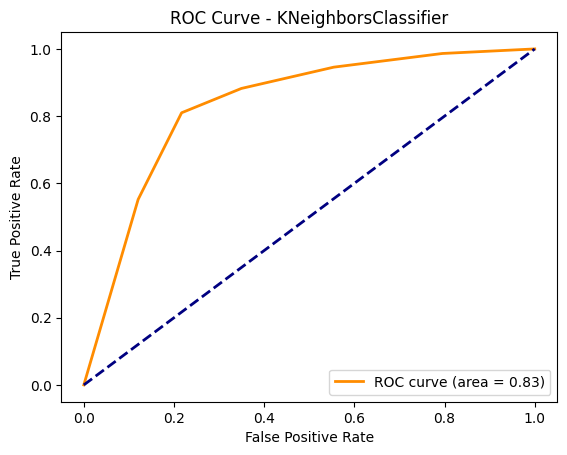

Model: GaussianNB
Train Data Confusion Matrix:
[[263 114]
 [ 94 742]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       377
           1       0.87      0.89      0.88       836

    accuracy                           0.83      1213
   macro avg       0.80      0.79      0.80      1213
weighted avg       0.83      0.83      0.83      1213

Test Data Confusion Matrix:
[[ 60  23]
 [ 23 198]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        83
           1       0.90      0.90      0.90       221

    accuracy                           0.85       304
   macro avg       0.81      0.81      0.81       304
weighted avg       0.85      0.85      0.85       304



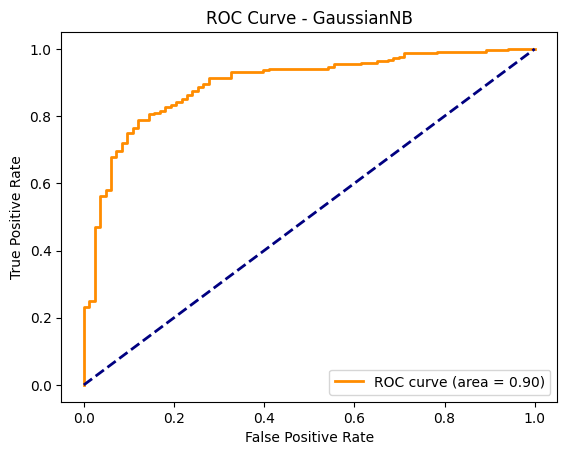

Model: BaggingClassifier
Train Data Confusion Matrix:
[[368   9]
 [ 14 822]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       377
           1       0.99      0.98      0.99       836

    accuracy                           0.98      1213
   macro avg       0.98      0.98      0.98      1213
weighted avg       0.98      0.98      0.98      1213

Test Data Confusion Matrix:
[[ 58  25]
 [ 28 193]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69        83
           1       0.89      0.87      0.88       221

    accuracy                           0.83       304
   macro avg       0.78      0.79      0.78       304
weighted avg       0.83      0.83      0.83       304



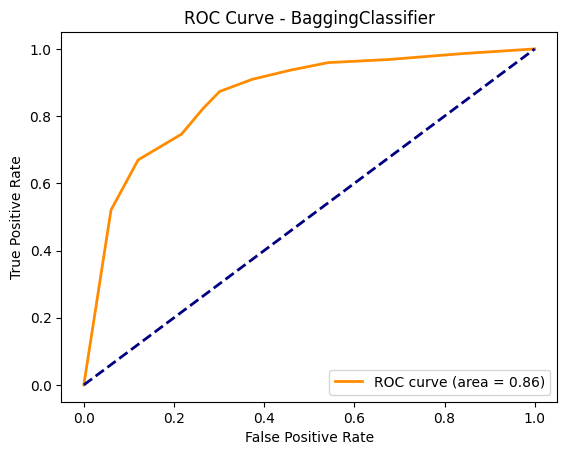

Model: AdaBoostClassifier
Train Data Confusion Matrix:
[[269 108]
 [ 87 749]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       377
           1       0.87      0.90      0.88       836

    accuracy                           0.84      1213
   macro avg       0.81      0.80      0.81      1213
weighted avg       0.84      0.84      0.84      1213

Test Data Confusion Matrix:
[[ 58  25]
 [ 20 201]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        83
           1       0.89      0.91      0.90       221

    accuracy                           0.85       304
   macro avg       0.82      0.80      0.81       304
weighted avg       0.85      0.85      0.85       304



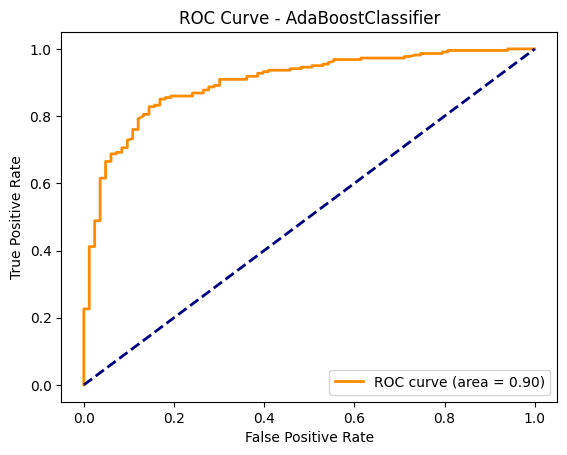

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

models = [knn_model, nb_model, bagging_model, boosting_model]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    print(f"Model: {model.__class__.__name__}")
    print("Train Data Confusion Matrix:")
    print(confusion_matrix(y_train, y_pred_train))
    print("Train Classification Report:")
    print(classification_report(y_train, y_pred_train))
    print("Test Data Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    print("Test Classification Report:")
    print(classification_report(y_test, y_pred_test))



    # ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Bagging Model Tuning
param_grid_bagging = {'n_estimators': [10, 50, 100, 200]}
grid_bagging = GridSearchCV(BaggingClassifier(), param_grid_bagging, cv=5)
grid_bagging.fit(X_train_scaled, y_train)

# Boosting Model Tuning
param_grid_boosting = {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}
grid_boosting = GridSearchCV(AdaBoostClassifier(), param_grid_boosting, cv=5)
grid_boosting.fit(X_train_scaled, y_train)

# Check the best parameters and their effect on model performance
print(f"Best Parameters for Bagging: {grid_bagging.best_params_}")
print(f"Best Parameters for Boosting: {grid_boosting.best_params_}")

# Evaluate the tuned models
y_pred_bagging_tuned = grid_bagging.predict(X_test_scaled)
y_pred_boosting_tuned = grid_boosting.predict(X_test_scaled)

# Assess the performance
print("Tuned Bagging Model Classification Report:")
print(classification_report(y_test, y_pred_bagging_tuned))
print("Tuned Boosting Model Classification Report:")
print(classification_report(y_test, y_pred_boosting_tuned))


Best Parameters for Bagging: {'n_estimators': 10}
Best Parameters for Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Tuned Bagging Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        83
           1       0.88      0.86      0.87       221

    accuracy                           0.81       304
   macro avg       0.76      0.78      0.77       304
weighted avg       0.82      0.81      0.81       304

Tuned Boosting Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        83
           1       0.86      0.92      0.89       221

    accuracy                           0.84       304
   macro avg       0.80      0.77      0.78       304
weighted avg       0.83      0.84      0.83       304



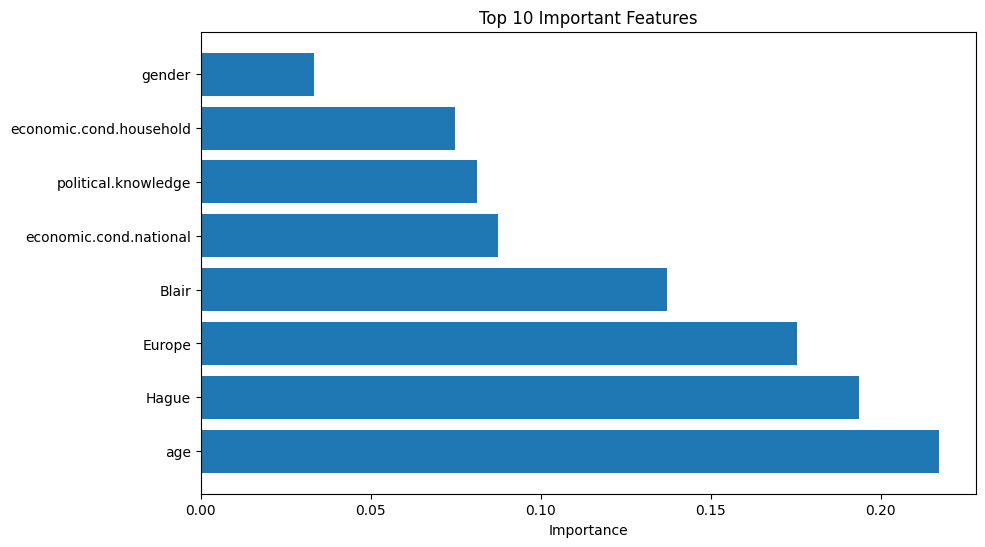

Feature Importances:
                   Feature  Importance
0                      age    0.217051
4                    Hague    0.193485
5                   Europe    0.175244
3                    Blair    0.137202
1   economic.cond.national    0.087545
6      political.knowledge    0.081259
2  economic.cond.household    0.074865
7                   gender    0.033350


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_train' and 'y_train' are your training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_features = 10  # You can adjust this based on your preferences
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_features], feature_importance_df['Importance'][:top_features])
plt.xlabel('Importance')
plt.title('Top {} Important Features'.format(top_features))
plt.show()

# Display the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)


In [ ]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load inaugural address texts
roosevelt_text = inaugural.raw('1941-Roosevelt.txt')
kennedy_text = inaugural.raw('1961-Kennedy.txt')
nixon_text = inaugural.raw('1973-Nixon.txt')

# Function to calculate number of characters, words, and sentences
def analyze_text(text, president_name):
    num_characters = len(text)
    num_words = len(word_tokenize(text))
    num_sentences = len(sent_tokenize(text))

    print(f"{president_name}'s Speech Analysis:")
    print(f"Number of Characters: {num_characters}")
    print(f"Number of Words: {num_words}")
    print(f"Number of Sentences: {num_sentences}\n")

# Analyze each speech
analyze_text(roosevelt_text, 'Roosevelt')
analyze_text(kennedy_text, 'Kennedy')
analyze_text(nixon_text, 'Nixon')


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Roosevelt's Speech Analysis:
Number of Characters: 7571
Number of Words: 1526
Number of Sentences: 68

Kennedy's Speech Analysis:
Number of Characters: 7618
Number of Words: 1543
Number of Sentences: 52

Nixon's Speech Analysis:
Number of Characters: 9991
Number of Words: 2006
Number of Sentences: 68



In [ ]:
nltk.download('stopwords')

# Function to perform text cleaning (stopword removal and stemming)
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    # Tokenize and remove stopwords
    words = [ps.stem(word.lower()) for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]

    return words

# Clean each speech
roosevelt_cleaned = clean_text(roosevelt_text)
kennedy_cleaned = clean_text(kennedy_text)
nixon_cleaned = clean_text(nixon_text)

# Function to find the 3 most common words in all three speeches
def find_most_common_words(cleaned_text, president_name):
    fdist = FreqDist(cleaned_text)
    common_words = fdist.most_common(3)

    print(f"{president_name}'s 3 Most Common Words:")
    for word, frequency in common_words:
        print(f"{word}: {frequency}")
    print()

# Find the 3 most common words in each speech
find_most_common_words(roosevelt_cleaned, 'Roosevelt')
find_most_common_words(kennedy_cleaned, 'Kennedy')
find_most_common_words(nixon_cleaned, 'Nixon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Roosevelt's 3 Most Common Words:
nation: 17
know: 10
peopl: 9

Kennedy's 3 Most Common Words:
let: 16
us: 12
power: 9

Nixon's 3 Most Common Words:
us: 26
let: 22
america: 21



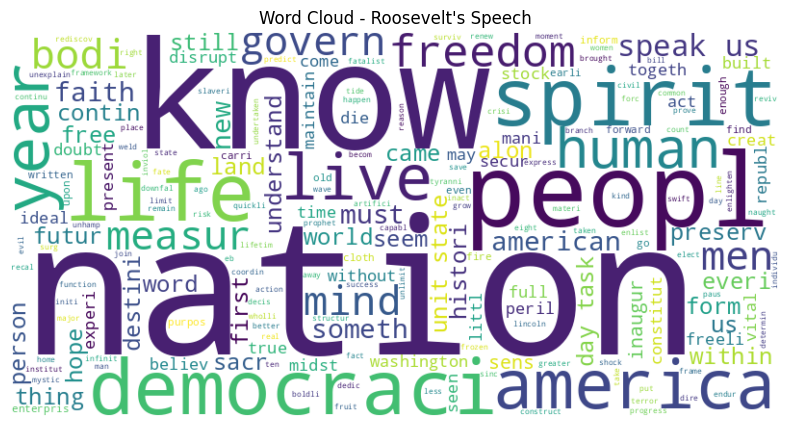

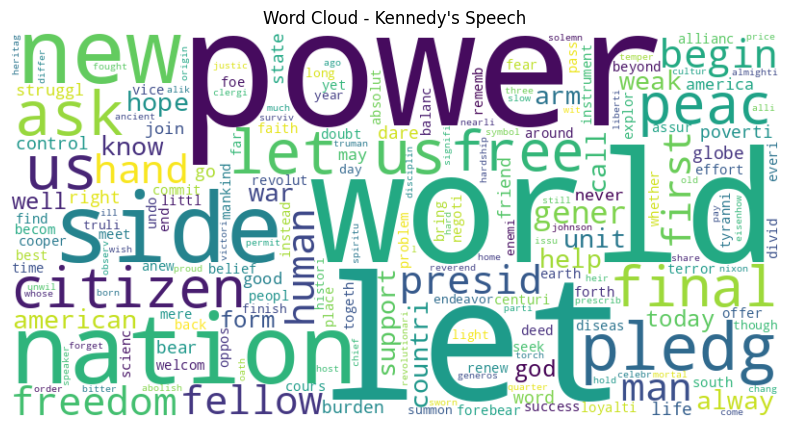

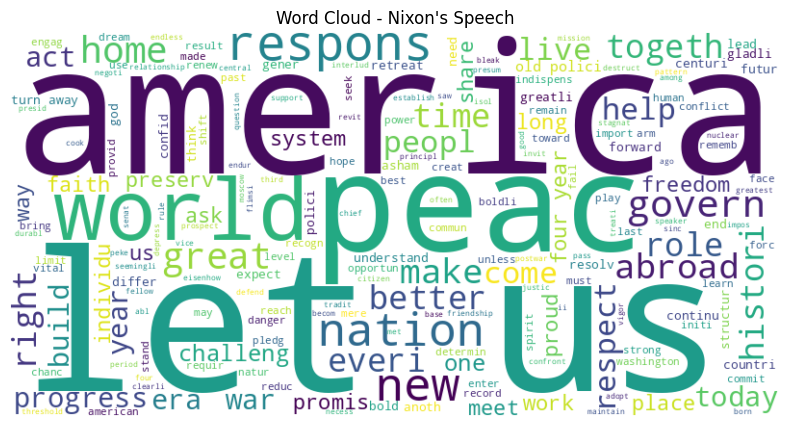

In [ ]:
# Function to plot word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for each speech
plot_wordcloud(roosevelt_cleaned, 'Word Cloud - Roosevelt\'s Speech')
plot_wordcloud(kennedy_cleaned, 'Word Cloud - Kennedy\'s Speech')
plot_wordcloud(nixon_cleaned, 'Word Cloud - Nixon\'s Speech')
